In [75]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
%%bash 
head training8b.json

{
   "questions": [
      {
         "body": "Is Hirschsprung disease a mendelian or a multifactorial disorder?",
         "documents": [
            "http://www.ncbi.nlm.nih.gov/pubmed/15858239",
            "http://www.ncbi.nlm.nih.gov/pubmed/15829955",
            "http://www.ncbi.nlm.nih.gov/pubmed/20598273",
            "http://www.ncbi.nlm.nih.gov/pubmed/6650562",
            "http://www.ncbi.nlm.nih.gov/pubmed/12239580",


In [77]:
df = pd.read_json('training8b.json') 
print(data)

                                              questions
0     {'body': 'Is Hirschsprung disease a mendelian ...
1     {'body': 'List signaling molecules (ligands) t...
2     {'body': 'Is the protein Papilin secreted?', '...
3     {'body': 'Are long non coding RNAs spliced?', ...
4     {'body': 'Is RANKL secreted from the cells?', ...
...                                                 ...
3238  {'body': 'List 3 indications for rituximab.', ...
3239  {'body': 'Is the crystal structure of Pim-1 av...
3240  {'body': 'Do tumour-associated macrophages hav...
3241  {'body': 'Is TNF-α an activator of pancreatic ...
3242  {'body': 'Can mitochondria transfer from cell ...

[3243 rows x 1 columns]


In [102]:
with open('training8b.json') as f: 
    d = json.load(f) 
    
#parent node is "questions"
df = pd.json_normalize(d['questions']) 
df.head(10)

,body,documents,ideal_answer,concepts,type,id,snippets,triples,exact_answer
0,Is Hirschsprung disease a mendelian or a multi...,"[http://www.ncbi.nlm.nih.gov/pubmed/15858239, ...","[Coding sequence mutations in RET, GDNF, EDNRB...",[http://www.disease-ontology.org/api/metadata/...,summary,55031181e9bde69634000014,"[{'offsetInBeginSection': 131, 'offsetInEndSec...",NaN,NaN
1,List signaling molecules (ligands) that intera...,"[http://www.ncbi.nlm.nih.gov/pubmed/23959273, ...",[The 7 known EGFR ligands are: epidermal grow...,[http://amigo.geneontology.org/cgi-bin/amigo/t...,list,55046d5ff8aee20f27000007,"[{'offsetInBeginSection': 1085, 'offsetInEndSe...",[{'p': 'http://purl.uniprot.org/core/encodedBy...,"[[epidermal growth factor], [betacellulin], [e..."
2,Is the protein Papilin secreted?,"[http://www.ncbi.nlm.nih.gov/pubmed/3320045, h...","[Yes, papilin is a secreted protein]",NaN,yesno,54e25eaaae9738404b000017,"[{'offsetInBeginSection': 1085, 'offsetInEndSe...",NaN,yes
3,Are long non coding RNAs spliced?,"[http://www.ncbi.nlm.nih.gov/pubmed/22955988, ...",[Long non coding RNAs appear to be spliced thr...,[http://www.nlm.nih.gov/cgi/mesh/2014/MB_cgi?f...,yesno,535d292a9a4572de6f000003,"[{'offsetInBeginSection': 546, 'offsetInEndSec...",NaN,yes
4,Is RANKL secreted from the cells?,"[http://www.ncbi.nlm.nih.gov/pubmed/22948539, ...",[Receptor activator of nuclear factor κB ligan...,"[http://www.uniprot.org/uniprot/TNF11_RAT, htt...",yesno,55262a9787ecba3764000009,"[{'offsetInBeginSection': 114, 'offsetInEndSec...",NaN,yes
5,Does metformin interfere thyroxine absorption?,[http://www.ncbi.nlm.nih.gov/pubmed/26191653],[No. There are not reported data indicating th...,[http://www.nlm.nih.gov/cgi/mesh/2012/MB_cgi?f...,yesno,51406e6223fec90375000009,"[{'offsetInBeginSection': 1418, 'offsetInEndSe...",NaN,no
6,Which miRNAs could be used as potential biomar...,"[http://www.ncbi.nlm.nih.gov/pubmed/21345725, ...","[miR-200a, miR-100, miR-141, miR-200b, miR-200...",[http://www.nlm.nih.gov/cgi/mesh/2015/MB_cgi?f...,list,553fa78b1d53b76422000007,"[{'offsetInBeginSection': 1010, 'offsetInEndSe...",NaN,"[[let-7a], [let-7b], [let-7i], [miR-21], [miR-..."
7,Which acetylcholinesterase inhibitors are used...,"[http://www.ncbi.nlm.nih.gov/pubmed/21815707, ...",[Pyridostigmine and neostygmine are acetylchol...,[http://www.nlm.nih.gov/cgi/mesh/2012/MB_cgi?f...,list,5149199dd24251bc05000040,"[{'offsetInBeginSection': 1251, 'offsetInEndSe...",NaN,"[[neostigmine], [pyridostigmine]]"
8,Has Denosumab (Prolia) been approved by FDA?,"[http://www.ncbi.nlm.nih.gov/pubmed/24126422, ...","[Yes, Denosumab was approved by the FDA in 2010.]",[http://www.biosemantics.org/jochem#4268082],yesno,52bf1db603868f1b06000011,"[{'offsetInBeginSection': 12, 'offsetInEndSect...",[{'p': 'http://www.w3.org/2004/02/skos/core#no...,yes
9,List the human genes encoding for the dishevel...,"[http://www.ncbi.nlm.nih.gov/pubmed/12883684, ...",[DVL-1\nDVL-2\nDVL-3],NaN,list,5709e4b2cf1c32585100001c,"[{'offsetInBeginSection': 294, 'offsetInEndSec...",NaN,"[[DVL-1], [DVL-2], [DVL-3]]"


In [103]:
df1 = pd.DataFrame(df['ideal_answer'].to_list())
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,"Coding sequence mutations in RET, GDNF, EDNRB,...",None,None,None,None,None,None,None,None,None,None,None
1,The 7 known EGFR ligands are: epidermal growt...,None,None,None,None,None,None,None,None,None,None,None
2,"Yes, papilin is a secreted protein",None,None,None,None,None,None,None,None,None,None,None
3,Long non coding RNAs appear to be spliced thro...,None,None,None,None,None,None,None,None,None,None,None
4,Receptor activator of nuclear factor κB ligand...,None,None,None,None,None,None,None,None,None,None,None
5,No. There are not reported data indicating tha...,None,None,None,None,None,None,None,None,None,None,None
6,"miR-200a, miR-100, miR-141, miR-200b, miR-200c...",None,None,None,None,None,None,None,None,None,None,None
7,Pyridostigmine and neostygmine are acetylcholi...,None,None,None,None,None,None,None,None,None,None,None
8,"Yes, Denosumab was approved by the FDA in 2010.",None,None,None,None,None,None,None,None,None,None,None
9,DVL-1\nDVL-2\nDVL-3,None,None,None,None,None,None,None,None,None,None,None


In [104]:
df2 = pd.DataFrame(df['exact_answer'].to_list())
df2.head(10)

,0
0,NaN
1,"[[epidermal growth factor], [betacellulin], [e..."
2,yes
3,yes
4,yes
5,no
6,"[[let-7a], [let-7b], [let-7i], [miR-21], [miR-..."
7,"[[neostigmine], [pyridostigmine]]"
8,yes
9,"[[DVL-1], [DVL-2], [DVL-3]]"


In [105]:
df['type'].unique()

array(['summary', 'list', 'yesno', 'factoid'], dtype=object)

### EDA

In [106]:
df.isnull().sum()

body               0
documents          0
ideal_answer       0
concepts        1389
type               0
id                 0
snippets           0
triples         2921
exact_answer     777
dtype: int64

In [107]:
df.describe()

,body,documents,ideal_answer,concepts,type,id,snippets,triples,exact_answer
count,3243,3243,3243,1854,3243,3243,3243,322,2466
unique,3243,3222,3229,1802,4,3243,3241,317,1562
top,Is pazopanib an effective treatment of gliobla...,[http://www.ncbi.nlm.nih.gov/pubmed/28471166],[Yes],[http://www.nlm.nih.gov/cgi/mesh/2015/MB_cgi?f...,factoid,54f4c382d0d681a040000006,"[{'offsetInBeginSection': 12, 'offsetInEndSect...",[{'p': 'http://data.linkedct.org/resource/link...,yes
freq,1,2,9,7,941,1,2,2,704


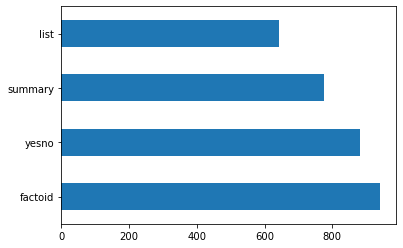

In [108]:
df.type.value_counts().plot.barh()
plt.show()

In [109]:
df.type.value_counts(normalize=True)

factoid    0.290163
yesno      0.271662
summary    0.239593
list       0.198582
Name: type, dtype: float64

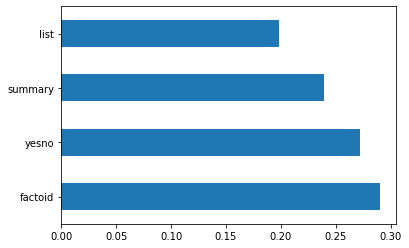

In [110]:
df.type.value_counts(normalize=True).plot.barh()
plt.show()

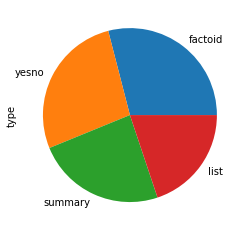

In [111]:
df.type.value_counts(normalize=True).plot.pie()
plt.show()

In [113]:
df.type.describe()

count        3243
unique          4
top       factoid
freq          941
Name: type, dtype: object